In [1]:
import pandas as  pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os 
import glob as gb
import tensorflow as tf
import keras 
import pickle as pickle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [2]:
trainpath = 'E:/Document/HK1-2023-2024/TLCN/BuildModel/Data/'
# trainpath = 'E:/Document/HK1-2023-2024/TLCN/BrainTumorMRI/'
# trainpath2 = 'E:/Document/HK1-2023-2024/TLCN/LungDisease/Lung Disease Dataset/'
train_size = 0
for folder in  os.listdir(trainpath + 'train') : 
    files = gb.glob(pathname= str( trainpath +'train//' + folder + '/*'))
    print(f'For training data , found {len(files)} in folder {folder}')
    train_size+=len(files)
    
# for folder in  os.listdir(trainpath2 + 'train') : 
#     files = gb.glob(pathname= str( trainpath2 +'train//' + folder + '/*'))
#     print(f'For training data , found {len(files)} in folder {folder}')
#     train_size+=len(files)
    
train_size

For training data , found 1205 in folder Bacterial Pneumonia
For training data , found 1218 in folder Corona Virus Disease
For training data , found 1321 in folder glioma
For training data , found 1339 in folder meningioma
For training data , found 1207 in folder Normal
For training data , found 1595 in folder notumor
For training data , found 1457 in folder pituitary
For training data , found 1220 in folder Tuberculosis
For training data , found 1204 in folder Viral Pneumonia


11766

In [3]:
testpath  = 'E:/Document/HK1-2023-2024/TLCN/BuildModel/Data/'
# testpath  = 'E:/Document/HK1-2023-2024/TLCN/BrainTumorMRI/'
# testpath2  = 'E:/Document/HK1-2023-2024/TLCN/LungDisease/Lung Disease Dataset/'
test_size = 0
for folder in  os.listdir(testpath + 'test') : 
    files = gb.glob(pathname= str( testpath +'test//' + folder + '/*'))
    print(f'For testing data , found {len(files)} in folder {folder}')
    test_size+=len(files)
    
# for folder in  os.listdir(testpath2 + 'test') : 
#     files = gb.glob(pathname= str( testpath2 +'test//' + folder + '/*'))
#     print(f'For testing data , found {len(files)} in folder {folder}')
#     test_size+=len(files)
    
test_size

For testing data , found 403 in folder Bacterial Pneumonia
For testing data , found 407 in folder Corona Virus Disease
For testing data , found 300 in folder glioma
For testing data , found 306 in folder meningioma
For testing data , found 404 in folder Normal
For testing data , found 405 in folder notumor
For testing data , found 300 in folder pituitary
For testing data , found 408 in folder Tuberculosis
For testing data , found 403 in folder Viral Pneumonia


3336

In [4]:
code = {'Viral Pneumonia' : 0 , 'Normal' : 1, 'Corona Virus Disease' : 2 , 'Bacterial Pneumonia' : 3, 'Tuberculosis' : 4, 
        'glioma' : 5 , 'meningioma' : 6, 'notumor' : 7 , 'pituitary' : 8}
#create a dictionary with their names & index , also create a function to get the index back
def convert_code (k):
    for x , y in code.items():
        if y == k :
            return x

In [9]:
# train_generator1 = ImageDataGenerator(rescale=1./255)
# train_generator2 = ImageDataGenerator(rescale=1./255)
# test_generator1 = ImageDataGenerator(rescale=1./255)
# test_generator2 = ImageDataGenerator(rescale=1./255)
train_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

s = 200
train = train_generator.flow_from_directory(trainpath + 'train', target_size=(s, s),batch_size=32, class_mode= "categorical", color_mode='grayscale')
test = test_generator.flow_from_directory(testpath + 'test', target_size=(s, s), batch_size=32, class_mode= "categorical", color_mode='grayscale')

# train_1 = train_generator1.flow_from_directory(trainpath + 'train', target_size=(s, s),batch_size=32, class_mode= "categorical", color_mode='grayscale')
# train_2 = train_generator2.flow_from_directory(trainpath2 + 'train', target_size=(s, s),batch_size=32, class_mode= "categorical", color_mode='grayscale')

# test_1 = test_generator1.flow_from_directory(trainpath + 'test', target_size=(s, s),batch_size=32, class_mode= "categorical", color_mode='grayscale')
# test_2 = test_generator2.flow_from_directory(trainpath2 + 'test', target_size=(s, s),batch_size=32, class_mode= "categorical", color_mode='grayscale')


Found 11766 images belonging to 9 classes.
Found 3336 images belonging to 9 classes.


In [11]:
model = None
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(64,(7,7), input_shape=(s, s, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4
model.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

 # Convolutional layer 5
model.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 6
model.add(Conv2D(512,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Full connect layers

model.add(Dense(units= 1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=9, activation='softmax'))

# model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy',
#                    metrics= ['categorical_accuracy'])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy'],
)


In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 200, 200, 64)      3200      
                                                                 
 batch_normalization_12 (Bat  (None, 200, 200, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 100, 100, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 100, 100, 128)     401536    
                                                                 
 batch_normalization_13 (Bat  (None, 100, 100, 128)    512       
 chNormalization)                                                
                                                      

In [13]:
history = model.fit(train, epochs=100, validation_data=test, verbose=1)

Epoch 1/100
368/368 [==============================] - 321s 857ms/step - loss: 1.6665 - categorical_accuracy: 0.5067 - val_loss: 3.2149 - val_categorical_accuracy: 0.1595
Epoch 2/100
368/368 [==============================] - 167s 452ms/step - loss: 0.8133 - categorical_accuracy: 0.6673 - val_loss: 6.5249 - val_categorical_accuracy: 0.2155
Epoch 3/100
368/368 [==============================] - 165s 448ms/step - loss: 0.6872 - categorical_accuracy: 0.7215 - val_loss: 3.0528 - val_categorical_accuracy: 0.2599
Epoch 4/100
368/368 [==============================] - 288s 782ms/step - loss: 0.5866 - categorical_accuracy: 0.7656 - val_loss: 0.9066 - val_categorical_accuracy: 0.6343
Epoch 5/100
368/368 [==============================] - 367s 996ms/step - loss: 0.5332 - categorical_accuracy: 0.7848 - val_loss: 2.4821 - val_categorical_accuracy: 0.4083
Epoch 6/100
368/368 [==============================] - 287s 774ms/step - loss: 0.4672 - categorical_accuracy: 0.8122 - val_loss: 0.6846 - val_cat

In [14]:
model.evaluate(test)

105/105 [==============================] - 14s 128ms/step - loss: 1.0194 - categorical_accuracy: 0.8393


[1.0193982124328613, 0.8393285274505615]

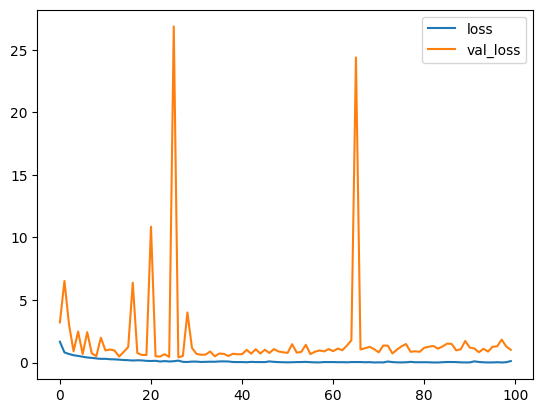

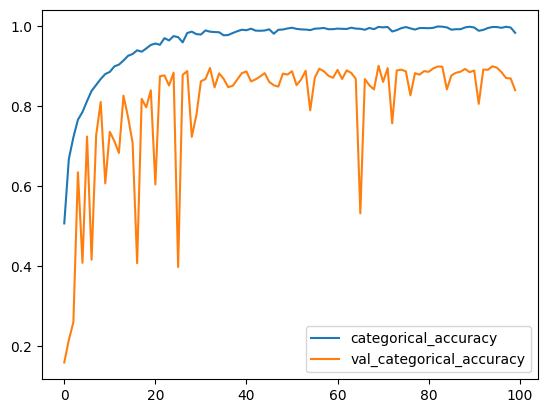

In [16]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss','val_loss']].plot()
history_frame.loc[:, ['categorical_accuracy','val_categorical_accuracy']].plot();

In [15]:
model.save("disease_model_weights.h5")

In [5]:
model2 = None
model2 = Sequential()
s = 200
# Convolutional layer 1
model2.add(Conv2D(64,(7,7), input_shape=(s, s, 1), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model2.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model2.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4
model2.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

 # Convolutional layer 5
model2.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 6
model2.add(Conv2D(512,(7,7), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())

# Full connect layers

model2.add(Dense(units= 1024, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(units=512, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(units=9, activation='softmax'))

# model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy',
#                    metrics= ['categorical_accuracy'])

model2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy'],
)


In [6]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 64)      3200      
                                                                 
 batch_normalization (BatchN  (None, 200, 200, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 128)     401536    
                                                                 
 batch_normalization_1 (Batc  (None, 100, 100, 128)    512       
 hNormalization)                                                 
                                                        

In [7]:
train_generator2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_generator2 = ImageDataGenerator(rescale=1./255)

s = 200
train2 = train_generator2.flow_from_directory(trainpath + 'train', target_size=(s, s),batch_size=32, class_mode= "categorical", color_mode='grayscale')
test2 = test_generator2.flow_from_directory(testpath + 'test', target_size=(s, s), batch_size=32, class_mode= "categorical", color_mode='grayscale')


Found 11766 images belonging to 9 classes.
Found 3336 images belonging to 9 classes.


In [8]:
model_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 6, verbose = 1)
model_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)

# Automatically saves the best weights of the model, based on best val_accuracy
model_mcp = ModelCheckpoint(filepath = 'model_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)

In [9]:
history2 = model2.fit(train2, epochs=300, validation_data=test2, callbacks=[model_es, model_rlr, model_mcp])

Epoch 1/300
368/368 [==============================] - ETA: 0s - loss: 1.8071 - categorical_accuracy: 0.4369
Epoch 1: val_categorical_accuracy improved from -inf to 0.20444, saving model to model_weights.h5
368/368 [==============================] - 237s 620ms/step - loss: 1.8071 - categorical_accuracy: 0.4369 - val_loss: 2.5086 - val_categorical_accuracy: 0.2044 - lr: 0.0010
Epoch 2/300
368/368 [==============================] - ETA: 0s - loss: 1.0652 - categorical_accuracy: 0.5668
Epoch 2: val_categorical_accuracy did not improve from 0.20444
368/368 [==============================] - 134s 364ms/step - loss: 1.0652 - categorical_accuracy: 0.5668 - val_loss: 2.6170 - val_categorical_accuracy: 0.1999 - lr: 0.0010
Epoch 3/300
368/368 [==============================] - ETA: 0s - loss: 0.9349 - categorical_accuracy: 0.6192
Epoch 3: val_categorical_accuracy improved from 0.20444 to 0.40348, saving model to model_weights.h5
368/368 [==============================] - 134s 365ms/step - loss: 

In [12]:
model2.evaluate(test2)

105/105 [==============================] - 42s 397ms/step - loss: 0.2045 - categorical_accuracy: 0.9173


[0.20450875163078308, 0.9172661900520325]

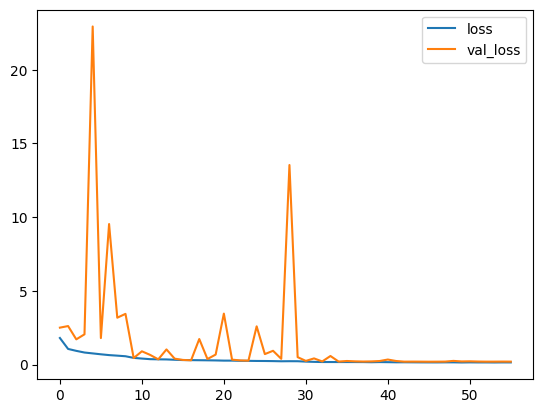

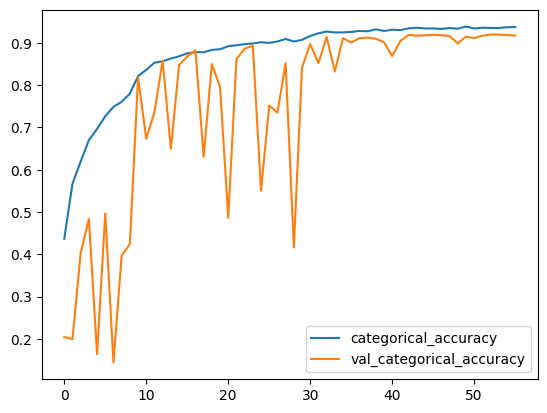

In [10]:
history_frame2 = pd.DataFrame(history2.history)
history_frame2.loc[:, ['loss','val_loss']].plot()
history_frame2.loc[:, ['categorical_accuracy','val_categorical_accuracy']].plot();